In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
set(df['day'].values)

{'Fri', 'Sat', 'Sun', 'Thur'}

<Axes: xlabel='day', ylabel='count'>

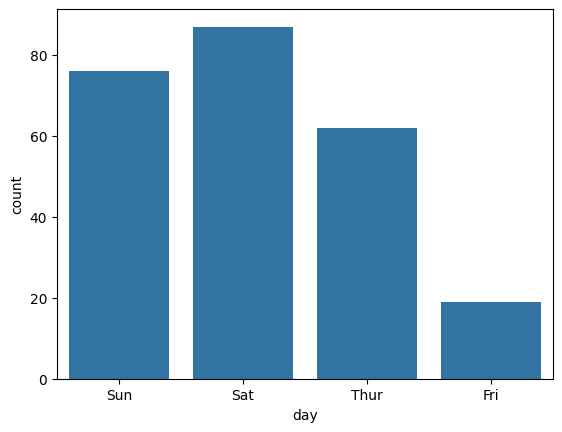

In [32]:
sns.countplot(data=df,x='day'
             )

In [33]:
set(df['time'].values)

{'Dinner', 'Lunch'}

<Axes: xlabel='time', ylabel='count'>

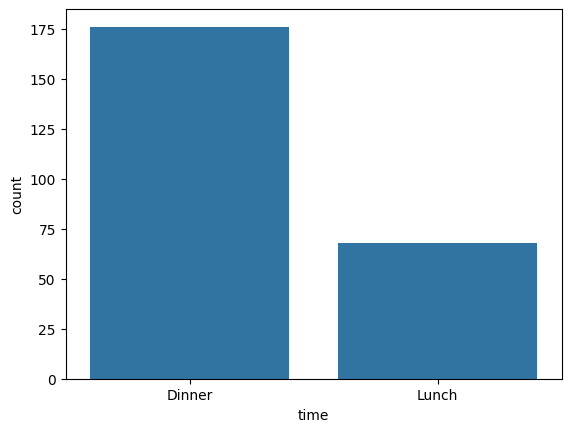

In [34]:
sns.countplot(data=df,x='time'
             )

<Axes: xlabel='smoker', ylabel='count'>

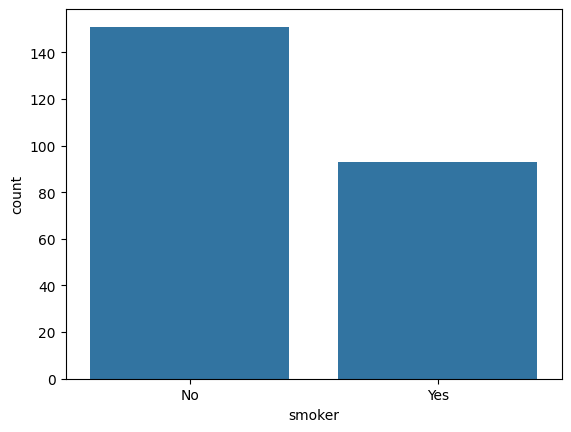

In [35]:
sns.countplot(data=df,x='smoker'
             )

In [36]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['time'] = df['time'].map({'Dinner': 0, 'Lunch': 1})




In [37]:
df = pd.get_dummies(df, columns=['day'], prefix='day')

In [38]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,1,0,0,2,False,False,True,False
1,10.34,1.66,0,0,0,3,False,False,True,False
2,21.01,3.50,0,0,0,3,False,False,True,False
3,23.68,3.31,0,0,0,2,False,False,True,False
4,24.59,3.61,1,0,0,4,False,False,True,False


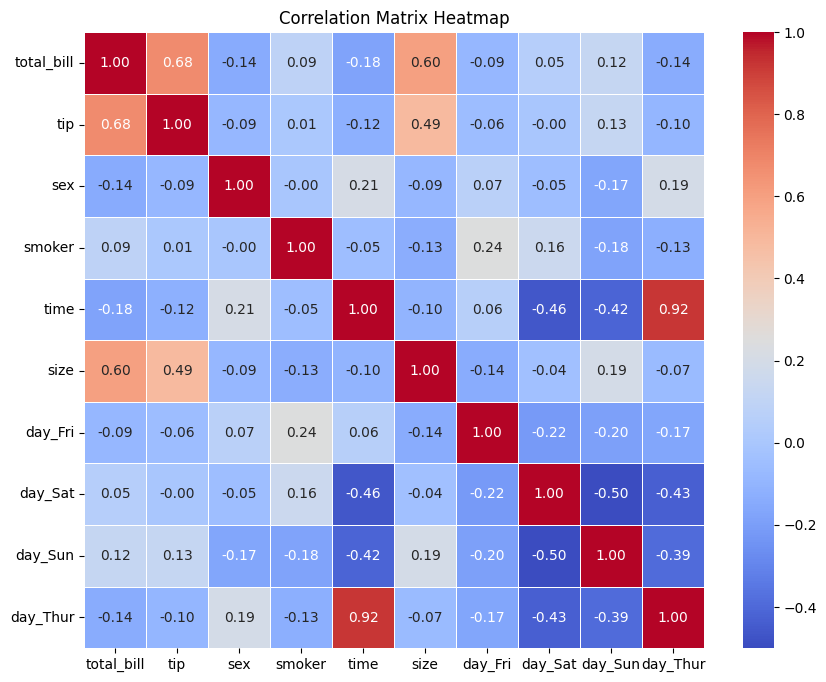

In [39]:

plt.figure(figsize=(10, 8))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

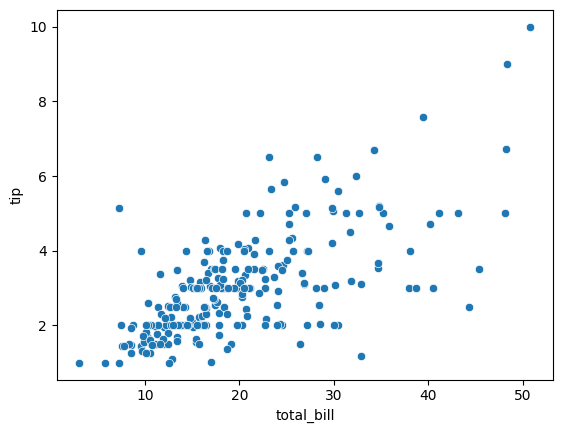

In [40]:
sns.scatterplot(x='total_bill',y='tip',data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

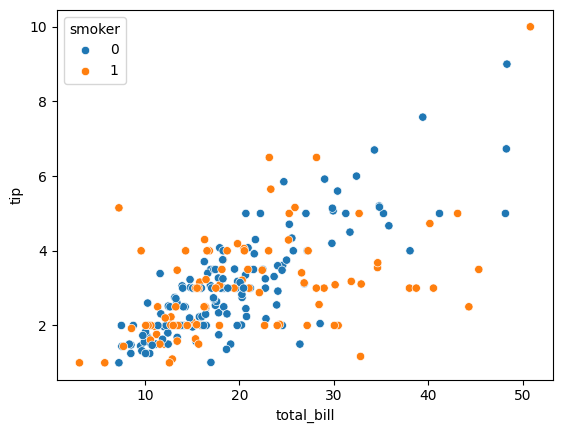

In [41]:
sns.scatterplot(x='total_bill',y='tip',hue='smoker',data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

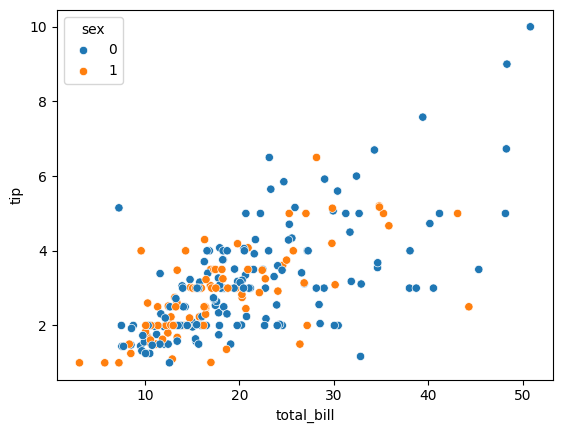

In [42]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=df)

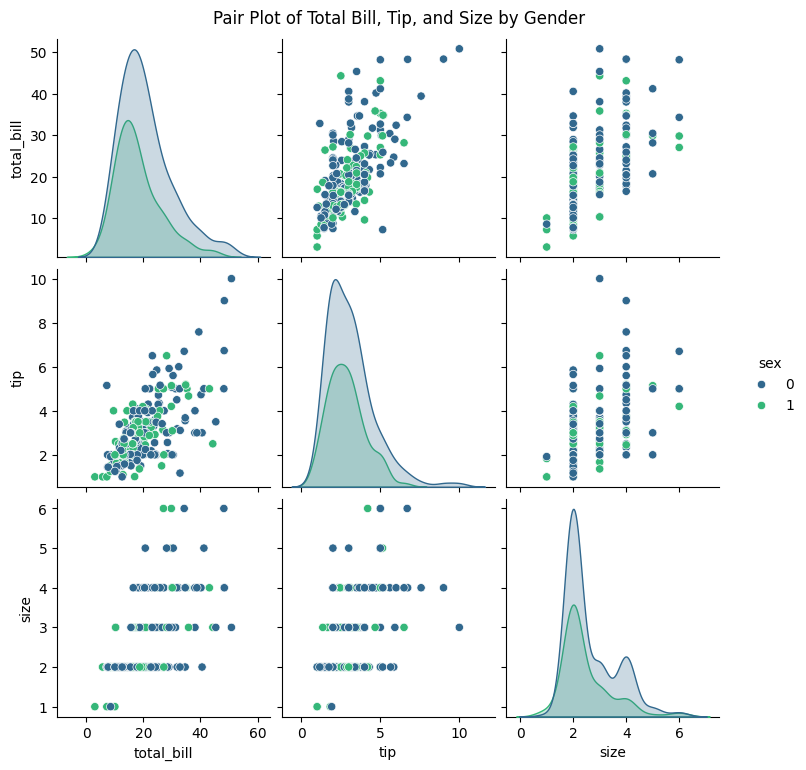

In [43]:

sns.pairplot(df, vars=['total_bill', 'tip', 'size'], hue='sex', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Total Bill, Tip, and Size by Gender', y=1.02)
plt.show()


<Axes: xlabel='size', ylabel='count'>

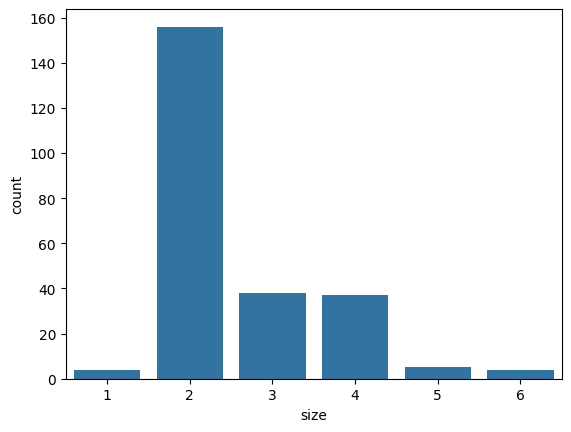

In [44]:
sns.countplot(x='size',data=df)

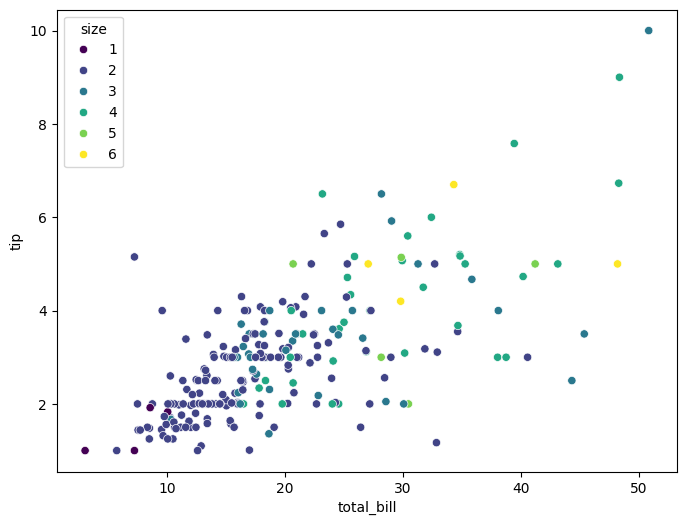

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', hue='size', data=df, palette="viridis")

plt.show()

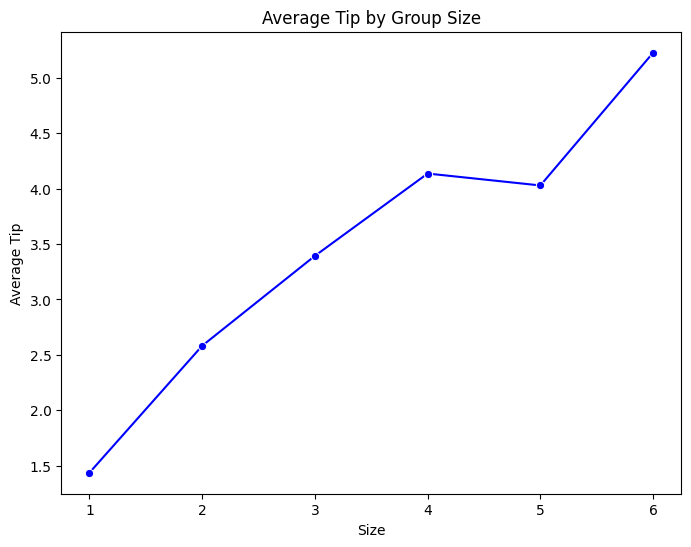

In [46]:

avg_tip_per_size = df.groupby('size')['tip'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(data=avg_tip_per_size, x='size', y='tip', marker='o', color='b')
plt.title('Average Tip by Group Size')
plt.xlabel('Size')
plt.ylabel('Average Tip')
plt.show()


In [47]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:

X = df.drop(columns=['tip'])
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'Model': model, 'RMSE': rmse}
    print(f"{name} RMSE: {rmse:.4f}")


Linear Regression RMSE: 0.8387
Ridge Regression RMSE: 0.8373
Lasso Regression RMSE: 0.7527
Support Vector Machine RMSE: 0.7290
K-Nearest Neighbors RMSE: 0.9223
Decision Tree RMSE: 1.0674
Random Forest RMSE: 0.9418


In [50]:
feature_importance = pd.DataFrame()
feature_importance['Feature'] = X.columns

for name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
    model = results[name]['Model']
    feature_importance[name] = model.coef_



In [51]:

for name in ['Decision Tree', 'Random Forest']:
    model = results[name]['Model']
    feature_importance[name] = model.feature_importances_
feature_importance = feature_importance.fillna(0)


In [52]:
feature_importance

,Feature,Linear Regression,Ridge Regression,Lasso Regression,Decision Tree,Random Forest
0,total_bill,0.094700,0.094682,0.093896,0.762698,0.779525
1,sex,-0.028819,-0.027961,-0.000000,0.024990,0.021912
2,smoker,-0.192353,-0.186768,-0.000000,0.060870,0.066532
3,time,0.094957,0.075320,-0.000000,0.011145,0.010837
4,size,0.233484,0.232193,0.000000,0.059953,0.054893
5,day_Fri,0.104075,0.098183,-0.000000,0.014037,0.008123
6,day_Sat,-0.081710,-0.086367,-0.000000,0.019560,0.025885
7,day_Sun,0.053282,0.048309,0.000000,0.034196,0.022900
8,day_Thur,-0.075646,-0.060126,-0.000000,0.012551,0.009394


In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'Model': model, 'RMSE': rmse, 'R-squared': r2}
    print(f"{name} RMSE: {rmse:.4f}, R-squared: {r2:.4f}")


Linear Regression RMSE: 0.8387, R-squared: 0.4373
Ridge Regression RMSE: 0.8373, R-squared: 0.4391
Lasso Regression RMSE: 0.7527, R-squared: 0.5467


Support Vector Machine RMSE: 0.7290, R-squared: 0.5749
K-Nearest Neighbors RMSE: 0.9223, R-squared: 0.3195
Decision Tree RMSE: 1.1186, R-squared: -0.0010
Random Forest RMSE: 0.9687, R-squared: 0.2493


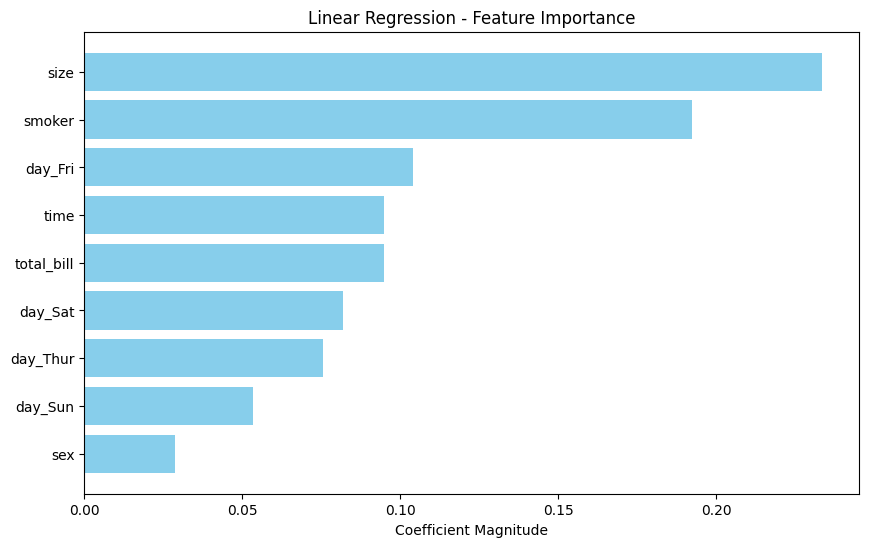

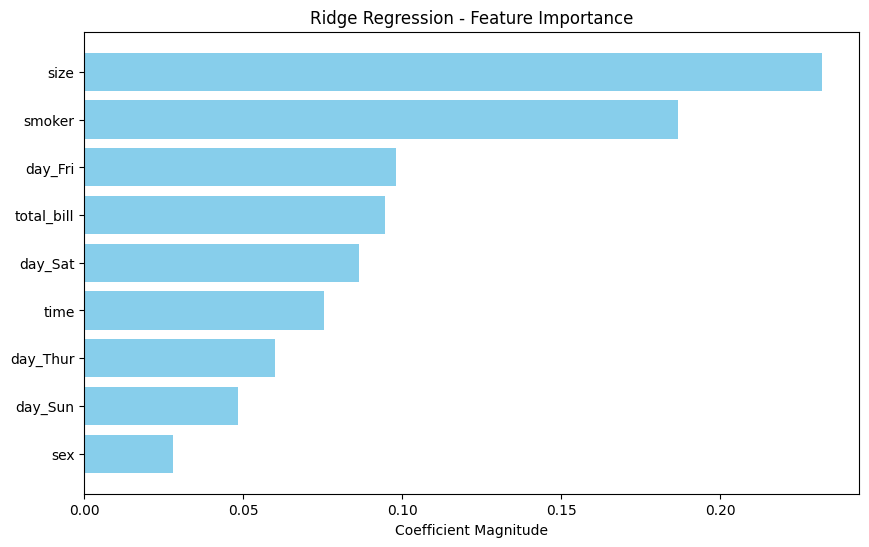

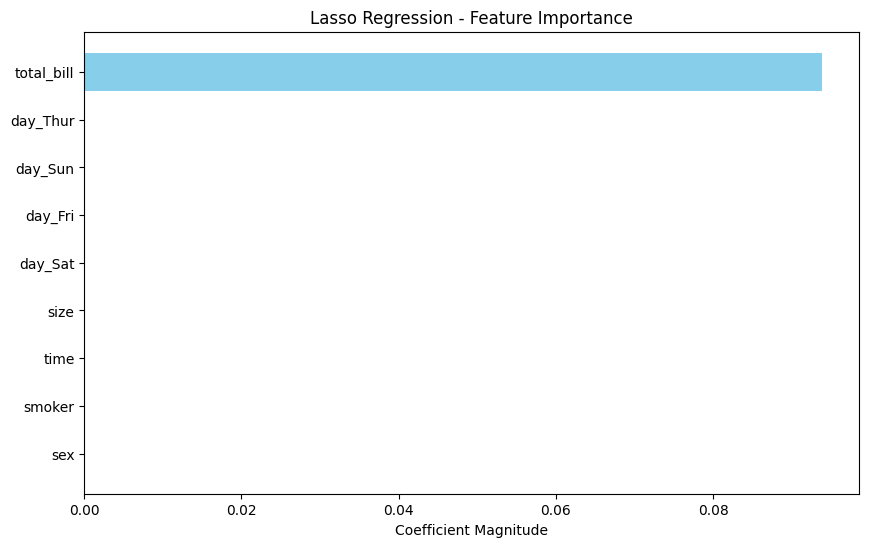

Support Vector Machine does not support feature importance or coefficients.
K-Nearest Neighbors does not support feature importance or coefficients.


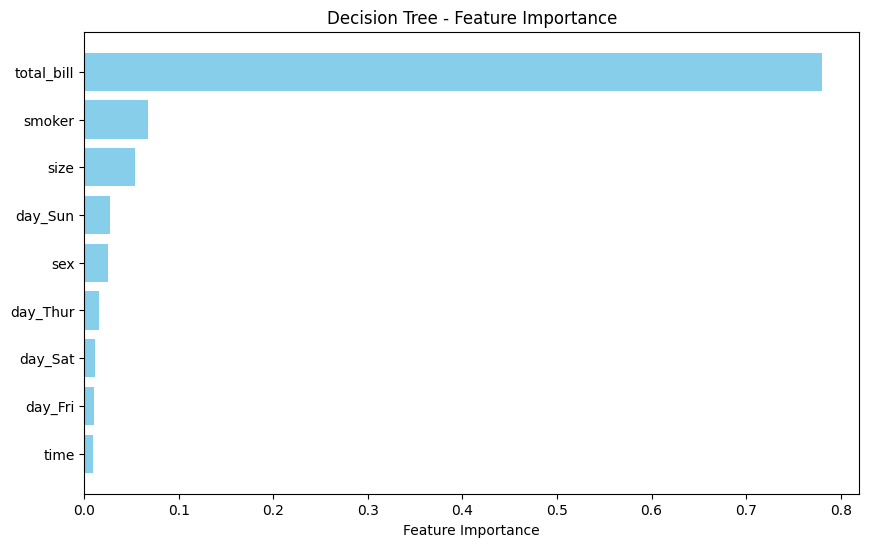

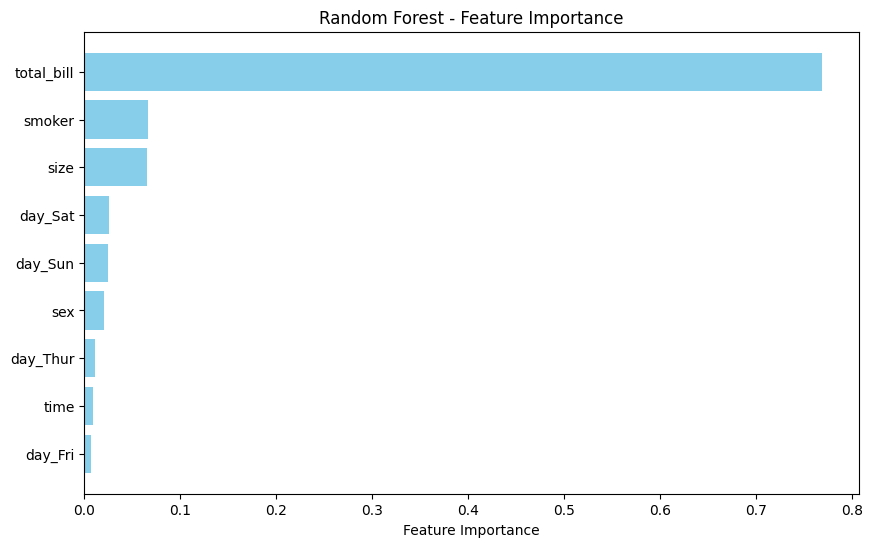

In [54]:
import matplotlib.pyplot as plt
import numpy as np

tree_based_models = ['Decision Tree', 'Random Forest']
linear_models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

def plot_feature_importance(model, model_name, feature_names):
    if model_name in tree_based_models:
        importance = model.feature_importances_
    elif model_name in linear_models:
        importance = np.abs(model.coef_)
    else:
        print(f"Feature importance is not available for {model_name}")
        return

    sorted_idx = np.argsort(importance)[::-1]
    sorted_features = [feature_names[i] for i in sorted_idx]
    sorted_importance = importance[sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importance, color='skyblue')
    plt.xlabel("Feature Importance" if model_name in tree_based_models else "Coefficient Magnitude")
    plt.title(f"{model_name} - Feature Importance")
    plt.gca().invert_yaxis()
    plt.show()
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

for name, model in models.items():
    if hasattr(model, "feature_importances_") or hasattr(model, "coef_"):
        plot_feature_importance(model, name, feature_names)
    else:
        print(f"{name} does not support feature importance or coefficients.")


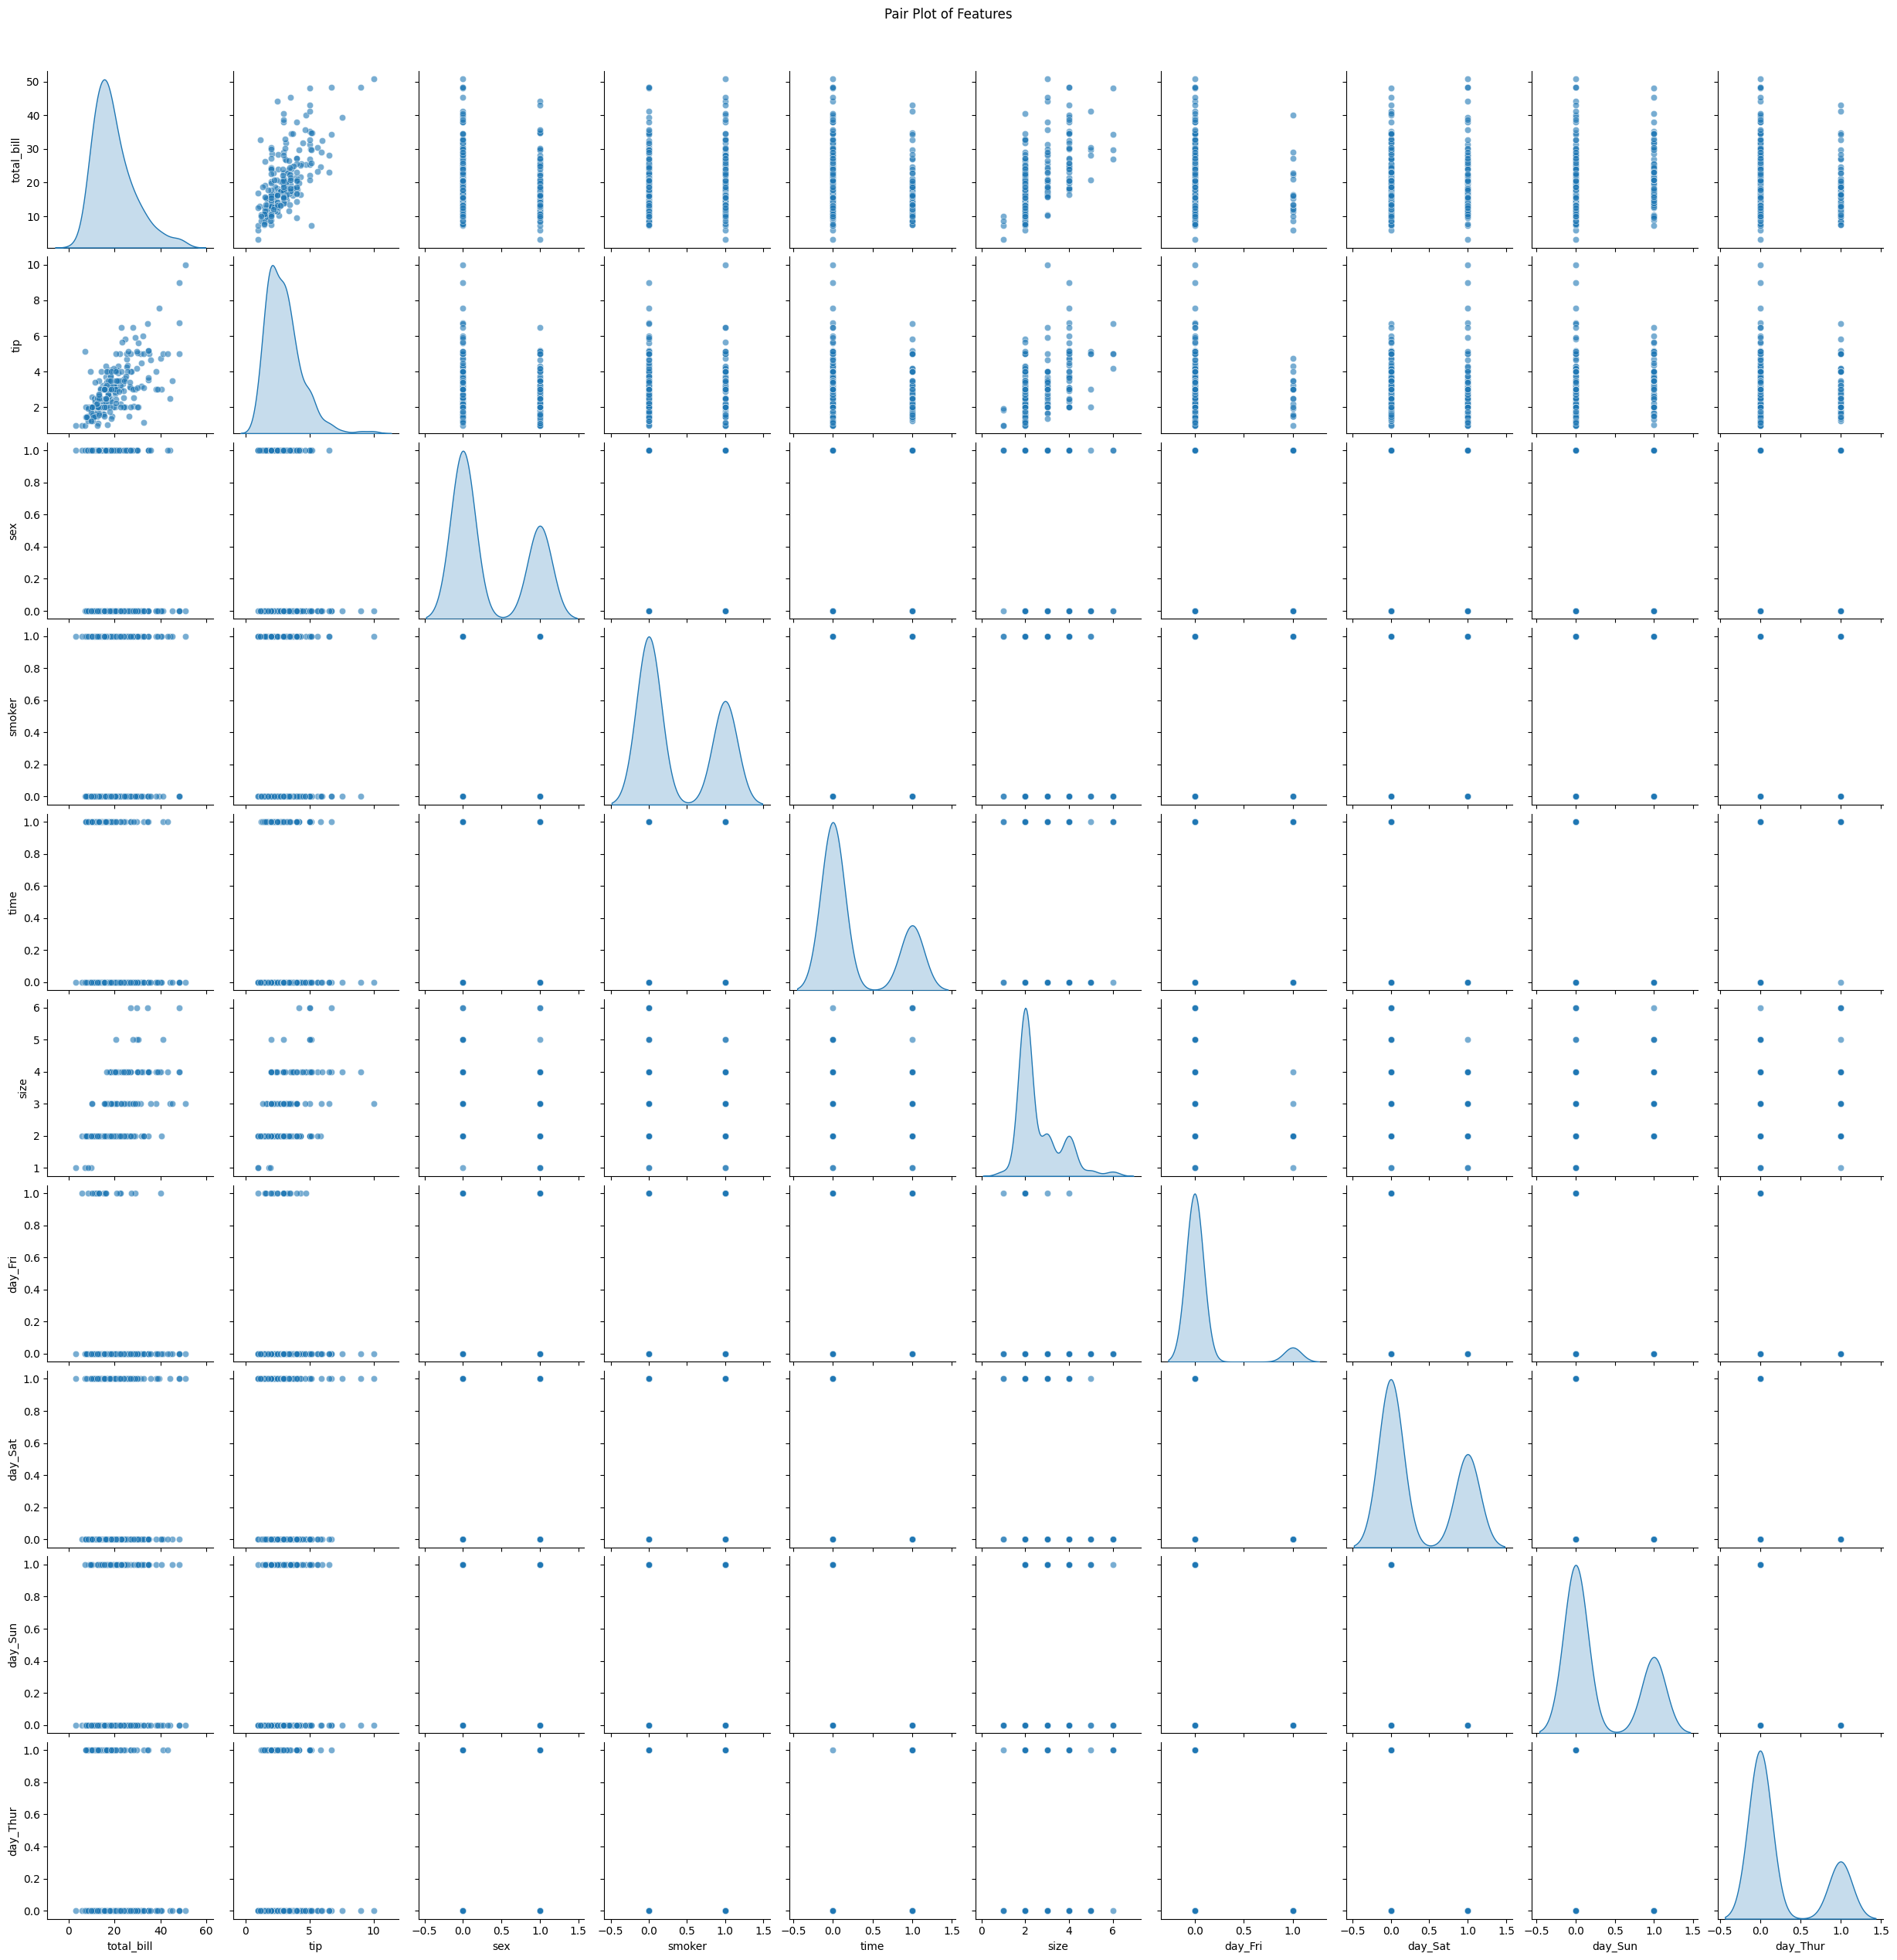

In [55]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

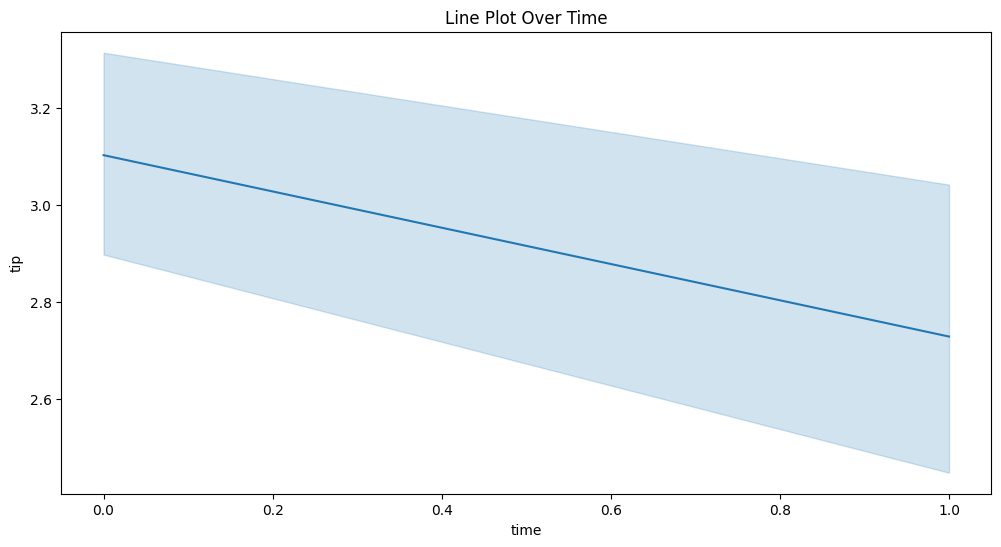

In [56]:

if 'day' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='day', y='tip')  
    plt.title("Line Plot Over Day")
    plt.show()

if 'time' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='time', y='tip')  
    plt.title("Line Plot Over Time")
    plt.show()

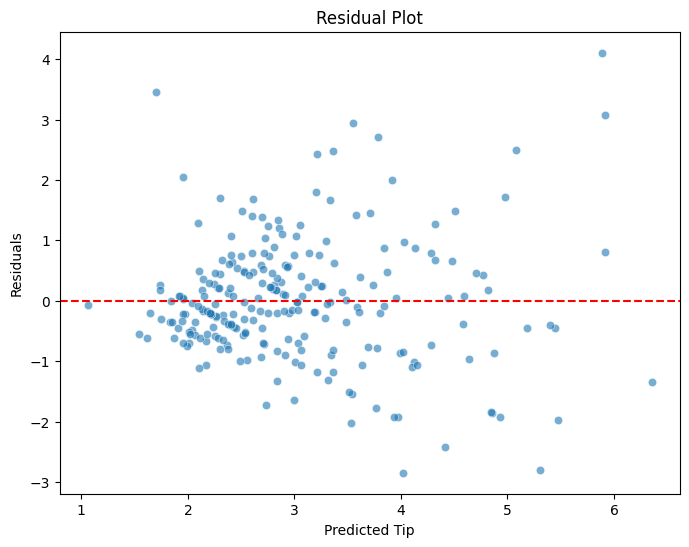

In [57]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
data = pd.read_csv('tips.csv')
X = data.drop('tip', axis=1) 
y = data['tip']
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), categorical_cols)
    ])

lin_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

lin_reg_pipeline.fit(X, y)

y_pred = lin_reg_pipeline.predict(X)

residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title("Residual Plot")
plt.show()